#importing libraries

In [4]:
## ======== YOUR CODE HERE ======== ##

## Import numpy, pandas, matplotlib, seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Logistic regression and SVC

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Import Confusion matrix, plot confusion matrix, classification report, accuracy score, auc-roc score and roc curve

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

## Import Label encoder, label binarizer and Standard Scaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

## ================================ ##

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

Read  the data

In [30]:
df=pd.read_csv("australia.csv")

In [32]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,71,88,1008.4,1004.7,7,7,14.6,13.3,1,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,87,64,1018.4,1016.8,7,7,3.8,8.5,1,0
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0


In [33]:
## Check the shape of data. It should be (24196,23)

## ======== YOUR CODE HERE ======== ##

print("Shape -> ",df.shape)
df.info()

## ================================ ##

Shape ->  (24196, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24196 entries, 0 to 24195
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24196 non-null  int64  
 1   Location       24196 non-null  int64  
 2   MinTemp        24196 non-null  float64
 3   MaxTemp        24196 non-null  float64
 4   Rainfall       24196 non-null  float64
 5   Evaporation    24196 non-null  float64
 6   Sunshine       24196 non-null  float64
 7   WindGustDir    24196 non-null  int64  
 8   WindGustSpeed  24196 non-null  int64  
 9   WindDir9am     24196 non-null  int64  
 10  WindDir3pm     24196 non-null  int64  
 11  WindSpeed9am   24196 non-null  int64  
 12  WindSpeed3pm   24196 non-null  int64  
 13  Humidity9am    24196 non-null  int64  
 14  Humidity3pm    24196 non-null  int64  
 15  Pressure9am    24196 non-null  float64
 16  Pressure3pm    24196 non-null  float64
 17  Cloud9am       24196 non-nul

In [34]:
## Apply describe on dataframe

## ======== YOUR CODE HERE ======== ##

df.describe()

## ================================ ##

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,...,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000
mean,1702.554430,11.126880,13.281232,23.124078,3.008857,5.114329,6.700591,7.752273,42.371880,7.315424,...,69.505621,55.335345,1016.774682,1014.508518,4.767152,4.926682,17.609216,21.493420,0.293396,0.453918
std,837.645705,6.397324,6.084032,6.681013,8.399269,3.549384,3.958287,4.788052,14.221336,4.634019,...,17.671186,20.907040,6.987625,6.877345,2.741416,2.586083,6.189396,6.535474,0.455328,0.497882
min,0.000000,0.000000,-4.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,3.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,984.000000,6.000000,8.600000,17.900000,0.000000,2.400000,3.400000,3.000000,31.000000,3.000000,...,58.000000,41.000000,1012.200000,1009.900000,2.000000,3.000000,12.700000,16.500000,0.000000,0.000000
50%,1651.000000,11.000000,13.100000,22.700000,0.000000,4.400000,7.200000,8.000000,41.000000,7.000000,...,70.000000,56.000000,1016.800000,1014.400000,6.000000,6.000000,17.300000,21.100000,0.000000,0.000000
75%,2381.000000,17.000000,18.000000,28.100000,1.800000,7.000000,10.000000,12.000000,50.000000,11.000000,...,83.000000,70.000000,1021.400000,1019.000000,7.000000,7.000000,22.300000,26.200000,1.000000,1.000000
max,3415.000000,22.000000,31.400000,46.800000,206.200000,59.800000,14.500000,15.000000,122.000000,15.000000,...,100.000000,100.000000,1040.200000,1037.000000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


Check missing values in the dataset and fill them by any method

In [35]:
## Check if there any null value in the dataset.

## ======== YOUR CODE HERE ======== ##

df.isnull().sum()

## ================================ ##

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Use Feature Encoding

In [36]:
## ======== YOUR CODE HERE ======== ##

## Use one hot encoding on dataframe

## Optional step 

ohe = pd.get_dummies(data=df)
print(ohe.shape)
ohe.head()


## ================================ ##


(24196, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,71,88,1008.4,1004.7,7,7,14.6,13.3,1,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,87,64,1018.4,1016.8,7,7,3.8,8.5,1,0
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0


split the data into train and test

In [37]:
## ======== YOUR CODE HERE ======== ##
 
## Test size should be 25% of the full dataset and use random state = 2021

Y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=2021)


## ================================ ##

In [38]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

## ================================ ##

X_train: (18147, 22)
X_test: (6049, 22)
y_train: (18147,)
y_test: (6049,)


scale the data using standard scalar

In [40]:
## Use Standard Scaler to scale the train and test data

## ======== YOUR CODE HERE ======== ##

scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

## ================================ ##

train the logistics regression using default parameters

In [41]:
## Use Random state = 2021 and fit the LR model

## ======== YOUR CODE HERE ======== ##

logreg = LogisticRegression(random_state=2021)
logreg.fit(X_train_scaled, y_train)

## ================================ ##

LogisticRegression(random_state=2021)

Plot Confusion Matrix using plot_confusion_matrix module :

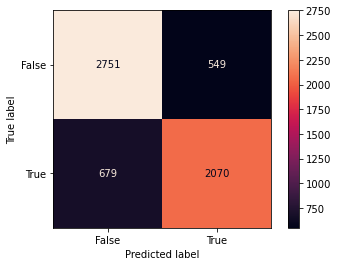

In [42]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.

plot_confusion_matrix(logreg,X_test_scaled,y_test, 
                     values_format='d',
                     display_labels=["False","True"],cmap='rocket')

## ================================ ##

Print out Classification Report for LR 

In [43]:
## ======== YOUR CODE HERE ======== ##

y_pred_logreg=logreg.predict(X_test_scaled)
print(classification_report(y_test,y_pred_logreg))

## ================================ ##


              precision    recall  f1-score   support

           0       0.80      0.83      0.82      3300
           1       0.79      0.75      0.77      2749

    accuracy                           0.80      6049
   macro avg       0.80      0.79      0.79      6049
weighted avg       0.80      0.80      0.80      6049



Print Training and Testing Score along with Accuracy score for LR 

In [44]:
## ======== YOUR CODE HERE ======== ##

print("Train Data Score: {}".format(logreg.score(X_train_scaled, y_train)))
print("Test Data Score: {}".format(logreg.score(X_test_scaled, y_test)))

## ================================ ##

Train Data Score: 0.7989199316691464
Test Data Score: 0.7969912382211936


In [45]:
## ======== YOUR CODE HERE ======== ##

## Print Accuracy Score for LR

print('Accuracy -> ',accuracy_score(y_test,y_pred_logreg))

## ================================ ##

Accuracy ->  0.7969912382211936


Print ROC - AUC Score for LR 

In [46]:
## ======== YOUR CODE HERE ======== ##

## Right way to calculate ROC_AUC score is by using predict_proba method given in official Docs. Sorry from our side.

print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_logreg)))

## ================================ ##

ROC AUC Scores: 0.7933187274711465


Train SVM with C = 50 and gamma = scale 

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Set probability = True 

clf_svm = SVC(random_state=2021,C=50,gamma='scale',kernel='rbf',probability=True)
clf_svm.fit(X_train_scaled, y_train)

%time

## ================================ ##

Plot Confusion Matrix for SVM 

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.

plot_confusion_matrix(clf_svm,X_test_scaled,y_test, 
                     values_format='d',
                     display_labels=["False","True"],cmap='rocket')


## ================================ ##


Print out Classification Report for SVM 

In [ ]:
## ======== YOUR CODE HERE ======== ##

y_pred1=clf_svm.predict(X_test_scaled)
print(classification_report(y_test,y_pred1))

## ================================ ##

Print out Accuracy score for SVM 

In [ ]:
## ======== YOUR CODE HERE ======== ##

print('Accuracy -> ',accuracy_score(y_test,y_pred1))

## ================================ ##

Print Training and Testing Score for SVM 

In [ ]:
## ======== YOUR CODE HERE ======== ##

print("Train Data Score: {}".format(clf_svm.score(X_train_scaled, y_train)))
print("Test Data Score: {}".format(clf_svm.score(X_test_scaled, y_test)))

## ================================ ##

Plot ROC curve and calculate ROC - AUC score for SVM 

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph

y_pred_svm_proba = clf_svm.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_proba[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-r',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for SVM (C=50)')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()


## ================================ ##

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Print out ROC score for SVM

print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred1)))

## ================================ ##

train SVM with C = 1 and gamma = scale 

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Train SVM with new mentioned parameters

%time
clf_svm_new = SVC(random_state=2021,probability=True,C=1,gamma='scale')
clf_svm_new.fit(X_train_scaled, y_train)

## ================================ ##

Print out Classification Report for new SVM 

In [ ]:
## ======== YOUR CODE HERE ======== ##

plot_confusion_matrix(clf_svm_new,X_test_scaled,y_test, 
                     values_format='d',
                     display_labels=["False","True"],cmap='rocket')

y_pred_svm=clf_svm_new.predict(X_test_scaled)
print(classification_report(y_test,y_pred_svm))


## ================================ ##

Plot ROC curve and calculate ROC - AUC score for the new SVM 

In [ ]:
## ======== YOUR CODE HERE ======== ##

y_pred_svm_proba_new = clf_svm_new.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_proba_new[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-r',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for SVM (C=1)')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_svm)))

## ================================ ##

Print Training and Testing Score along with accuracy score for the new SVM 

In [ ]:
## ======== YOUR CODE HERE ======== ##

print("Train Data Score: {}".format(clf_svm_new.score(X_train_scaled, y_train)))
print("Test Data Score: {}".format(clf_svm_new.score(X_test_scaled, y_test)))

## ================================ ##

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Print out Accuracy score for the new SVM

print('Accuracy -> ',accuracy_score(y_test,y_pred_svm))

## ================================ ##

Calculate Average Cross-Val score for the new SVM with 5 folds  

In [ ]:
## ======== YOUR CODE HERE ======== ##

## Find mean for the calculated CV scores

scores = cross_val_score(clf_svm_new, X_train_scaled, y_train, cv = 5)
print('Cross-validation scores:{}'.format(scores))

print('Average cross-validation score: {}'.format(scores.mean()))


## ================================ ##